In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt
from PIL import Image
import os

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


imageGenKnight/0128.png
(128, 256, 3)


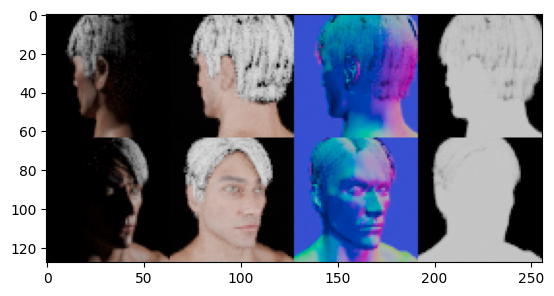

In [83]:
def GetImageAdress(input_number, additionalString = ""):
    return "imageGenKnight/" + additionalString + str(input_number).zfill(4) + ".png"
print(GetImageAdress(128, ""))

def GetImage(image_number,  additionalString = "" ):
    adress = GetImageAdress(image_number,  additionalString)
    image = Image.open(adress)
    image = np.array(image)
    image = image / 255
    image = image.astype('float16')
    return image



In [112]:
all_albedos = list()
all_normals = list()
all_masks = list()
# answers start at 4775, end at 4799
answerHeadRotation = open("ImageGenKnight\ImageAnswers.txt", "r").read()
answerHeadRotation = answerHeadRotation.replace('Knight', '')
answerHeadRotation = answerHeadRotation.split("ANSWER")
answerHeadRotation.pop()
for pictire in range( len(answerHeadRotation)):
    numnum = 4775 + pictire
    all_albedos.append(GetImage(numnum, "albedo"))
    all_normals.append(GetImage(numnum, "normal"))
    all_masks.append(GetImage(numnum, "mask"))
np.save('KnightRotationDegrees.npy', np.array(answerHeadRotation))
np.save('KnightAlbedos.npy', np.array(all_albedos))
np.save('KnightNormals.npy', np.array(all_normals))
np.save('KnightMasks.npy', np.array(all_masks))

In [133]:
answerHeadRotation = open("ImageGenKnight\ImageData.txt", "r").read()
answerHeadRotation = answerHeadRotation.split("Knight")
answerHeadRotation.pop(0)

all_labels = list()
all_vectors = list()
for dd in range(len(answerHeadRotation)):
    splitty = answerHeadRotation[dd].split("VectorXYZ")
    all_labels.append(splitty[0])
    vector = splitty[1].split("_")
    all_vectors.append(np.array(vector).astype("float16"))
np.save('KnightLabels.npy', np.array(all_labels))
np.save('KnightVectors.npy', np.array(all_vectors))    

In [139]:
all_photos = list()
for pictire in range( len(answerHeadRotation)):
    all_photos.append(GetImage(pictire, ""))
all_photos_array = np.array(all_photos)
np.save('KnightPhotos.npy', np.array(all_photos_array))